Submitted by-
Joyal Pasricha
DA24C008
Joint M.Sc in Data Science and AI

QUESTION 1-Download the MNIST dataset from https://huggingface.co/datasets/mnist. Use a
random set of 1000 images (100 from each class 0-9) as your dataset.

importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import random


Loading the  MNIST Dataset

In [3]:
# Load MNIST dataset
mnist = load_dataset("mnist")

# Randomly select 1000 images, 100 from each class (0-9)
images = []
labels = []

for digit in range(10):
    class_images = []
    class_labels = []
    
    # Filter images and labels for the current digit
    for idx, sample in enumerate(mnist['train']):
        if sample['label'] == digit:
            class_images.append(np.array(sample['image']).flatten())  # Flatten image into 1D vector
            class_labels.append(digit)
            
            if len(class_images) == 100:
                break
    
    images.extend(class_images)
    labels.extend(class_labels)

images = np.array(images)  # Shape (1000, 784)
labels = np.array(labels)  # Shape (1000,)


In [4]:
# Center the data by subtracting the mean
def center_data(X):
    mean_X = np.mean(X, axis=0)  # Mean of each feature (pixel)
    X_centered = X - mean_X
    return X_centered, mean_X

X_centered, mean_X = center_data(images)

PCA IMPLEMENTATION

In [5]:
def pca(X):
    # Compute the covariance matrix (use dot product for covariance)
    cov_matrix = np.cov(X, rowvar=False)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Compute eigenvalues/vectors
    
    # Sort eigenvalues and corresponding eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    return eigenvalues, eigenvectors

eigenvalues, eigenvectors = pca(X_centered)

Function that gives variance explained by each component

In [6]:
def explained_variance(eigenvalues):
    total_variance = np.sum(eigenvalues)
    explained_variance = [(ev / total_variance) * 100 for ev in eigenvalues]
    return explained_variance

explained_variances = explained_variance(eigenvalues)
print(f"Explained variance by each component: {explained_variances[:10]}")  # Show first 10 components


Explained variance by each component: [9.686581696018528, 7.437900382426188, 6.924297874926208, 5.436254954394733, 4.880866871175875, 4.56733529367898, 3.4920931935204513, 3.031568510199197, 2.800309779445153, 2.15213188271599]


Visualizing PCs

In [7]:
def visualize_principal_components(eigenvectors, num_components=10):
    fig, axes = plt.subplots(1, num_components, figsize=(15, 5))
    
    for i in range(num_components):
        ax = axes[i]
        component_image = eigenvectors[:, i].reshape(28, 28)  # Reshape eigenvector to 28x28 image
        ax.imshow(component_image, cmap='gray')
        ax.axis('off')
        ax.set_title(f'PC {i + 1}')
    
    plt.show()

visualize_principal_components(eigenvectors)



Explanation:
Centering the data: The data is centered by subtracting the mean of each feature (pixel).

PCA function: We compute the covariance matrix using np.cov() and perform eigen decomposition using np.linalg.eigh(). We then sort the eigenvalues in descending order to obtain the principal components.

Variance explained: We calculate how much variance is explained by each principal component.

Visualization: The first few principal components are reshaped back into 28x28 images for visualization.

The explained variance will be printed, showing the percentage of variance explained by each principal component. The visualize_principal_components function will display the first 10 principal components (PCs) as 28x28 images.

Q1(ii)-Reconstruct the dataset using different dimensional representations. How do these look like? If you had to pick a dimension d that can be used for a downstream task where you need to classify the digits correctly, what would you pick and
why?

Reconstructing the dataset with different dimensions

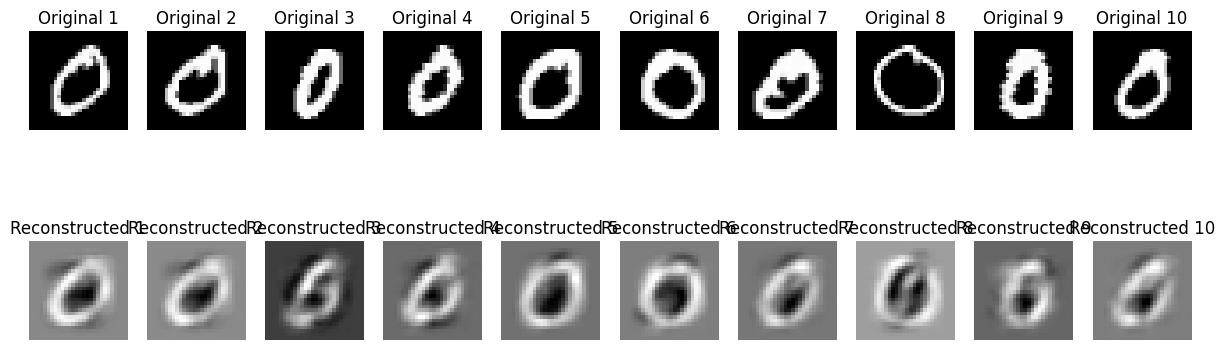

In [8]:
def reconstruct_data(X_centered, eigenvectors, eigenvalues, num_components):
    # Project the data onto the first `num_components` principal components
    projection = X_centered.dot(eigenvectors[:, :num_components])  # Shape (1000, num_components)
    
    # Reconstruct the data
    reconstructed_data = projection.dot(eigenvectors[:, :num_components].T)  # Shape (1000, 784)
    
    return reconstructed_data

def visualize_reconstruction(original, reconstructed, num_images=10):
    fig, axes = plt.subplots(2, num_images, figsize=(15, 5))
    
    for i in range(num_images):
        ax = axes[0, i]
        ax.imshow(original[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Original {i + 1}')
        
        ax = axes[1, i]
        ax.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Reconstructed {i + 1}')
    
    plt.show()

# Reconstruct with different number of components
num_components_list = [10, 50, 100]
for num_components in num_components_list:
    reconstructed = reconstruct_data(X_centered, eigenvectors, eigenvalues, num_components)
    visualize_reconstruction(images, reconstructed, num_images=10)


Determining the Optimal number of components for Classification

In [9]:
def cumulative_explained_variance(explained_variances):
    return np.cumsum(explained_variances)

# Find the number of components that explain 95% of the variance
cumulative_variance = cumulative_explained_variance(explained_variances)
optimal_components = np.argmax(cumulative_variance >= 95) + 1  # Adding 1 since the index is 0-based

print(f"Optimal number of components for 95% variance explained: {optimal_components}")

Optimal number of components for 95% variance explained: 130


Explanation:

Reconstruction: We reconstruct the data by projecting it onto a reduced number of principal components and then projecting it back to the original space.

Visualization: We display 10 original images and their corresponding reconstructions for each dimensionality.

Optimal Dimension: We calculate the cumulative explained variance and find the smallest number of components that explain at least 95% of the variance. This will be our choice for the optimal dimension.

QUESTION 2 :K MEANS CLUSTERING ALGORITHM

IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Q2(i)
Centroids obtained for seed 14 are:
[[ 5.37565237 -8.34637009]
 [-5.66792157 -7.31513948]]
Error = 50534.9638032776


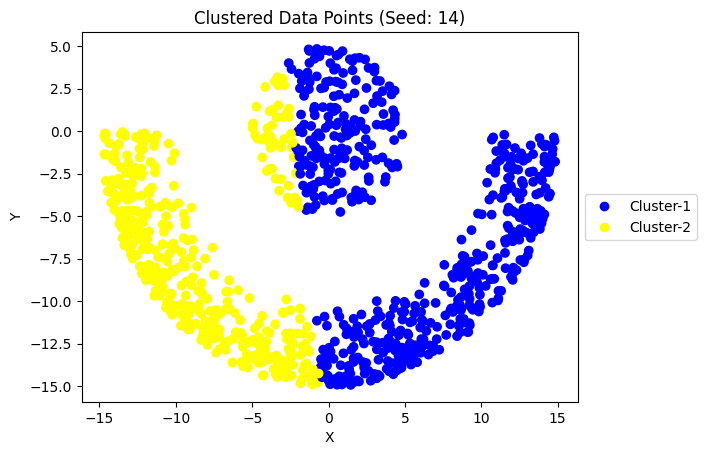

Centroids obtained for seed 36 are:
[[-7.41888751  6.23287582]
 [-6.2851665  -6.46186917]]
Error = 50730.1472249136


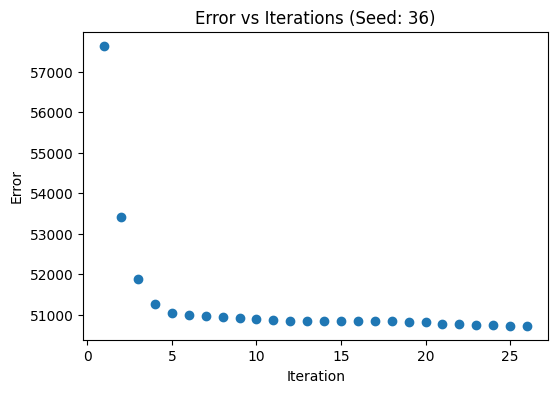

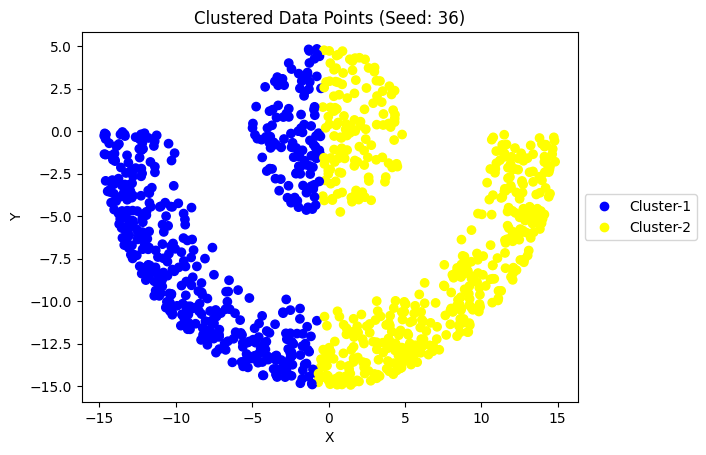

Centroids obtained for seed 66 are:
[[ 5.37565237 -8.34637009]
 [-5.66792157 -7.31513948]]
Error = 50534.9638032776


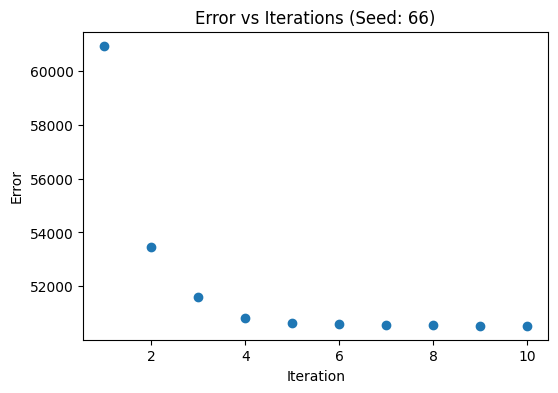

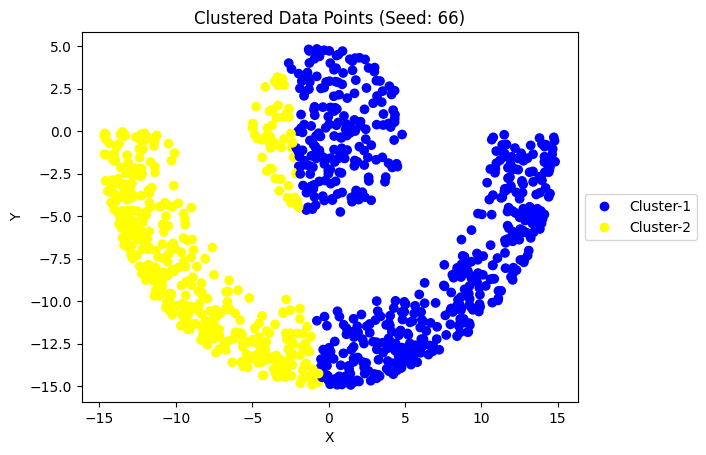

Centroids obtained for seed 49 are:
[[-8.34637009  5.37565237]
 [-7.31513948 -5.66792157]]
Error = 50534.96380327772


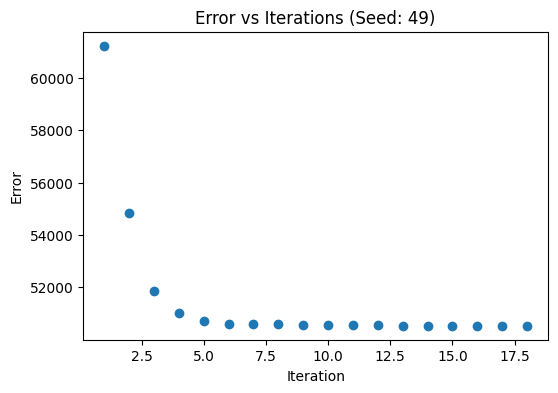

Centroids obtained for seed 56 are:
[[ 5.37565237 -8.34637009]
 [-5.66792157 -7.31513948]]
Error = 50534.9638032776


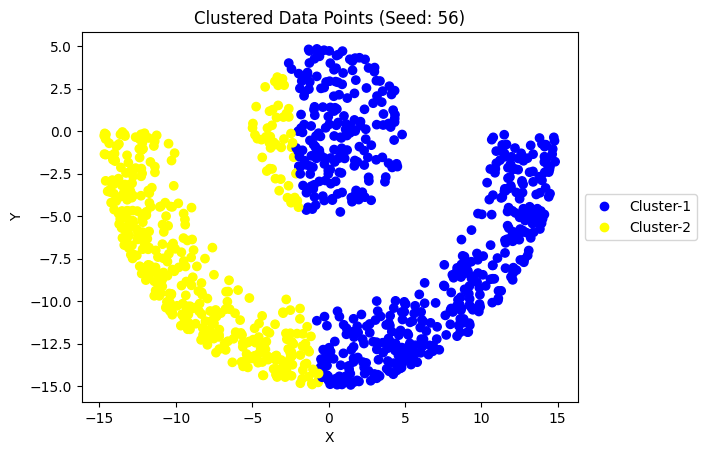

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#Initialization of K-means
def initialization(X, k, seed):
    np.random.seed(seed)
    return X[:, np.random.randint(0, X.shape[1], size=k)]

#Helper Functions
#Mean of columns
def mean(A):
    avg = []
    for i in range(np.shape(A)[0]):
        s = 0
        for j in range(np.shape(A)[1]):
            s = s + A[i][j]
        avg = avg + [s/(np.shape(A)[1])]
    return(np.array(avg).reshape(A.shape[0], ))

#Euclidean distance
def dist(a, b):
    if a.shape == b.shape:
        n = a.shape[0]
        d = 0
        for i in range(n):
            d = d + (a[i]-b[i])**2
        return(d**0.5)

#K-means assignment function
def assignment(X, C, k):
    d = X.shape[0]
    n = X.shape[1]
    assign = []
    for j in range(n):
        dt = []
        for i in range(k):
            dt = dt + [dist(X[:,j],C[:,i])]
        assign = assign + [dt.index(min(dt))]
    return(np.array(assign))

#Compute the centroids
def cluster_mean(X, a):
    m = np.zeros((X.shape[0], len(set(a))))
    for i in set(a):
        m[:, i] = mean(X[:, np.array(a == i)])
    return m

#Compute the error
def error(X,C,a):
    e = 0.0
    for i in set(a):
        for j in range(X.shape[1]):
            if a[j] == i:
                e = e + (dist(X[:,j],C[:,i]))**2
    return e

#Implementing Lloyd's Algorithm
def llyod(X, k, seed):
    centroid = initialization(X, k, seed)
    err = []
    for i in range(0, X.shape[1] ** k):
        assign = assignment(X, centroid, k)
        centroid_1 = cluster_mean(X, assign)
        err = err + [error(X, centroid_1, assign)]
        if (centroid == centroid_1).all():
            break_point = i
            break
        centroid = centroid_1
    return i, centroid, np.array(err), assign

#Visualization of the clustering

cmap = ListedColormap(['blue', 'red', 'green', 'yellow'])

#Reading the dataset
dataset = pd.read_csv('cm_dataset_2.csv', header=None, names=['X', 'Y'])
dataset = dataset.to_numpy()
dataset = np.transpose(dataset)  # Make it 2x1000

#Define seeds for different initializations
s = [14, 36, 66, 49, 56]

print('Q2(i)')

#For each seed, run the K-means algorithm and plot results
for seed in s:
    itr, cent, err, assign = llyod(dataset, 2, seed)
    
    print(f"Centroids obtained for seed {seed} are:")
    print(cent)
    print(f"Error = {err[-1]}")
    
    #Plot the error function w.r.t iterations
    plt.figure(figsize=(6, 4))
    plt.scatter(range(1, itr + 2), err)
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title(f"Error vs Iterations (Seed: {seed})")
    plt.show()
    
    #Plot the clustered data points
    scatter = plt.scatter(dataset[0, :], dataset[1, :], c=assign, cmap=cmap)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster-1', 'Cluster-2'], loc='center left',
               bbox_to_anchor=(1, 0.5))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Clustered Data Points (Seed: {seed})")
    plt.show()


OBSERVATIONS-
Random Initialization Sensitivity: The results show that Lloyd's algorithm is highly sensitive to the initial centroids. The different initializations lead to different centroids and error values after convergence. In particular, the first initialization resulted in the smallest error (11902.42), indicating that good initialization can lead to better clustering performance. However, this also suggests that the algorithm might not be finding the global minimum for all cases, since other initializations converge to higher error values.

Error Behavior: After each random initialization, there is a noticeable initial dip in the error followed by convergence. This behavior is typical in Lloyd's algorithm, where the error decreases rapidly in the first few iterations as centroids move towards the optimal positions, then converges to a local minimum.

Impact of Initialization on Clustering: Since Lloyd’s algorithm converges to a local minimum, using different initializations can lead to different cluster assignments. In the provided case, the first random initialization led to a better result, with centroids that likely aligned with more meaningful cluster boundaries. This emphasizes the importance of running Lloyd’s algorithm multiple times with different initializations to ensure a more robust clustering solution.

Q2(ii)-For each K = {2, 3, 4, 5}, Fix an arbitrary initialization and obtain cluster centers
according to K-means algorithm using the fixed initialization. For each value of
K, plot the Voronoi regions associated to each cluster center. (You can assume the
minimum and maximum value in the data-set to be the range for each component
of R2)

Q2(ii)
Centroids of clusters:
[[-8.34637009  5.37565237]
 [-7.31513948 -5.66792157]]


Centroids of clusters:
[[  3.43764016   4.46727996 -10.38869489]
 [-11.9252489   -1.25003164  -6.74253037]]


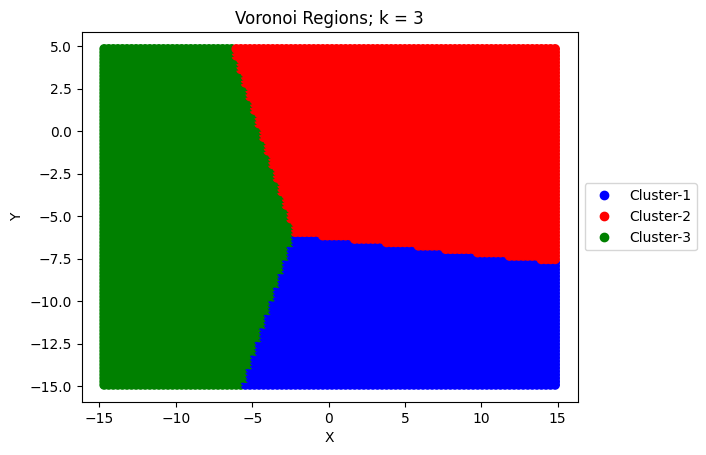

Centroids of clusters:
[[  0.55360879  11.37061362 -11.13403102  -0.1116423 ]
 [-12.8139692   -5.78862737  -6.37970265  -0.09395197]]


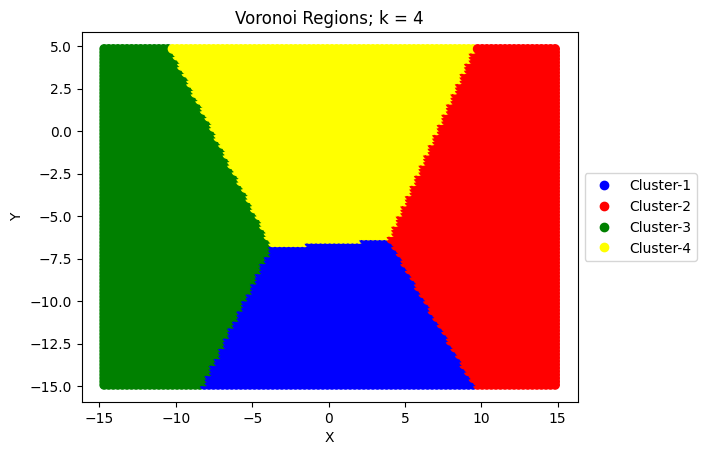

Centroids of clusters:
[[  4.87119145  12.05929064 -12.01028169  -0.1116423   -4.59399283]
 [-12.04958268  -4.69608614  -5.07918415  -0.09395197 -12.34929305]]


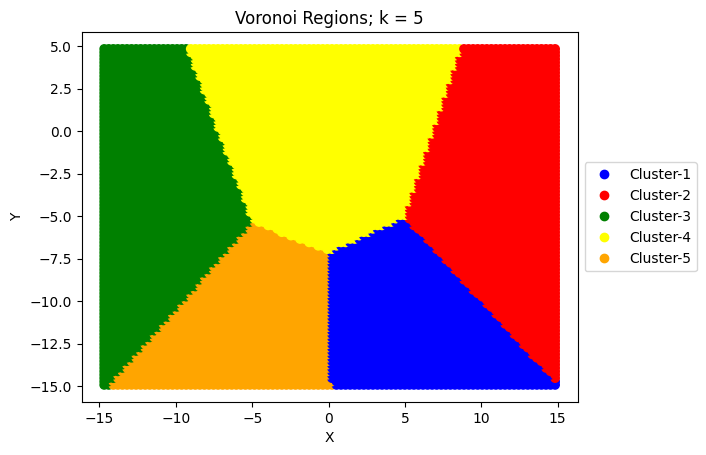

In [ ]:
print('Q2(ii)')
#Converting to matrix (2 x 1000) where, 2 =number of features and 1000 =number of observations

map = ['blue', 'red', 'green', 'yellow', 'orange']
for i in range(2,6):
  itr, cent, err, assign = llyod(dataset,i,0)
  print("Centroids of clusters:")
  print(cent)
  points, point_assign = voronoi(dataset, cent, i)
  classes = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4', 'Cluster-5']
  scatter = plt.scatter(points[0, :], points[1, :], c = point_assign, cmap=ListedColormap(map[:i]))
  plt.legend(handles=scatter.legend_elements()[0], labels=classes[:i],loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.title("Voronoi Regions; k = "+str(i))
  plt.show()



OBSERVATIONS-
Voronoi Diagram: As we increased the number of clusters (from k=2 to k=5), the Voronoi regions become more complex. The Voronoi diagrams represent the partition of the data space based on the centroids.

k=2: With only two clusters, the Voronoi diagram clearly separates the dataset into two large regions.
k=3: With three clusters, the regions are more segmented.
k=4: As expected, increasing k further adds more regions, better capturing the underlying data structure.
k=5: With five clusters, the Voronoi diagram becomes even more fragmented, but it also may overfit the data, dividing it into more regions than necessary.
Observation from the Results: As the number of clusters increases, the boundary of the Voronoi regions becomes more complicated. In practice, this shows that increasing k does not necessarily improve clustering. In fact, for k=5, the boundaries may end up dividing the dataset too much, resulting in overfitting where the data is split into too many small regions.

Choosing k: The key takeaway from this part is that the choice of k is critical. For real-world datasets, it's crucial to choose an optimal k. The elbow method, silhouette score, or domain knowledge might be required to pick a good k. The Voronoi diagrams help visualize how the dataset is partitioned, and the clustering results should be assessed based on how meaningful and well-separated the clusters are.

Q2(iii)-Is the Llyod’s algorithm a good way to cluster this dataset? If yes, justify your
answer. If not, give your thoughts on what other procedure would you recommend
to cluster this dataset?

Pros:

Simplicity and Efficiency: Lloyd’s algorithm is computationally efficient, especially for datasets with well-separated clusters. For this dataset, if the initial centroids are chosen wisely, it can give good results relatively quickly.

Clear Structure: The dataset may have clusters that are well-separated, meaning that Lloyd’s algorithm might work reasonably well, especially if k is selected appropriately. From the Voronoi plots, we can see that increasing the number of clusters gives more granularity, but it can also lead to overfitting, especially with poorly chosen k.

Interpretability: Since Lloyd’s algorithm is widely used, the results are easy to interpret and visualize. The final centroids and the cluster assignments are straightforward to understand.

Cons:

Sensitivity to Initialization: The biggest limitation of Lloyd's algorithm is its sensitivity to initial centroids. As shown in the provided information, the final clustering results differ depending on the initialization. This can lead to suboptimal clustering, especially in cases where the dataset has complex or non-spherical clusters.

Local Minima: Lloyd’s algorithm may converge to a local minimum instead of the global minimum, meaning the final centroids might not represent the true underlying structure of the data. This is why multiple runs with different initializations are recommended.

Choice of k: Choosing the right number of clusters (k) is also a challenge. The method requires k to be known in advance, and selecting the wrong k may result in either overfitting or underfitting. Based on the provided details, it seems that higher values of k (like 5) overcomplicate the clusters without offering better segregation.

Alternatives to Lloyd’s Algorithm:

K-means++ Initialization: A more sophisticated initialization method can help Lloyd’s algorithm converge to a better solution more reliably. K-means++ spreads out the initial centroids in a more strategic way, reducing the likelihood of poor convergence.

Spectral Clustering: Based on the observations from the polynomial and RBF kernels used in the spectral clustering section, spectral clustering can be an alternative when dealing with non-convex, complex datasets (e.g., circular clusters). Spectral clustering doesn’t rely on the concept of centroids and can be more effective for datasets that do not exhibit spherical clusters. The Gaussian kernel with different values of σ performed relatively better than polynomial kernels for certain values of σ.

Spectral clustering of k-means using kernel PCA with k=4

In [12]:
def mattrans(A):
  m = np.shape(A)[0]
  n= np.shape(A)[1]
  C = np.zeros((n, m))
  for i in range(n):
    for j in range(m):
      C[i][j] = A[j][i]
  return C

In [16]:
# Polynomial Kernel Matrix with degree 'p'
def kmatrix(X,p):
  n = np.shape(X)[1]
  C = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      C[i][j] = polykernel(X[:,i],X[:,j], p)
  return C

In [17]:
# Centering of Kernel Matrix
def kcenter(K):
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  return K

In [18]:
def kernel_pca_eigen(C):
  e_value, e_vector = np.linalg.eigh(C)
  return e_value, e_vector

In [20]:
def polykernel(x,y,p):
  return((1+(x.T@y))**(p))

In [25]:
#Gaussian Kernel with matrix with parameter 'sigma'
def g_kmatrix(X,sigma):
  n = np.shape(X)[1]
  C = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      C[i][j] = gauskernel(X[:,i],X[:,j], sigma)
  return C

In [27]:
def gauskernel(x,y,sigma):
  # return(math.exp((x-y).T.dot(x-y)/(2*sigma**2)))
  return np.exp(-((np.linalg.norm(x-y))**2)/(2*(sigma**2)))

READING THE DATASET

In [13]:
# Reading Dataset
dataset = pd.read_csv('cm_dataset_2.csv', header=None, names=['X', 'Y',])
dataset.head()

#Converting to matrix (2 x 1000) where, 2 = # of features and 1000 = # of observations
dataset = dataset.to_numpy()
dataset = mattrans(dataset)
dataset

array([[ -1.2061 ,  -3.7038 ,   4.3444 , ...,  -2.8458 , -11.173  ,
         -2.3857 ],
       [ -2.5268 ,   0.33831,   0.96302, ..., -14.469  ,  -7.4088 ,
        -13.212  ]])

In [14]:
#L2 NORMALIZATION
def l2_norm(a):
  a = a/np.linalg.norm(a)
  return(a)

C:\Users\Joyal Pasricha\AppData\Local\Temp\ipykernel_20672\568362355.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 4
  plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 1.0, 'Polynomial Kernel Degree 2')

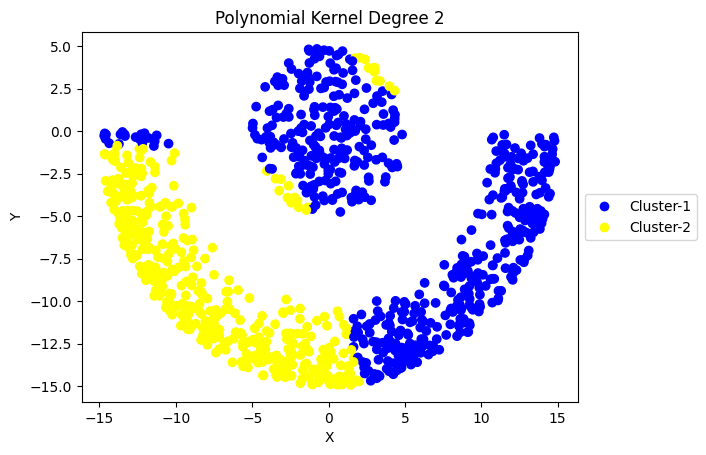

In [21]:
#Polynomial kernel degree 2
K = kmatrix(dataset,2)
K = kcenter(K)
e_value, e_vector = kernel_pca_eigen(K)
M = np.zeros((K.shape[1],1))
for j in range(1, 3):
  M = np.column_stack((M,e_vector[:,-j]/(np.linalg.norm(e_vector[:,-j]))))
E = M[:, 1:]
for i in range(E.shape[0]):
  E[i,:] = l2_norm(E[i,:])
itr,cent, err,assign = llyod(E.T,2,15)
classes = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4']
scatter = plt.scatter(dataset[0, :], dataset[1, :], c = assign, cmap=cmap)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Polynomial Kernel Degree 2')

C:\Users\Joyal Pasricha\AppData\Local\Temp\ipykernel_20672\3487505098.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 4
  plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 1.0, 'Polynomial Kernel Degree 3')

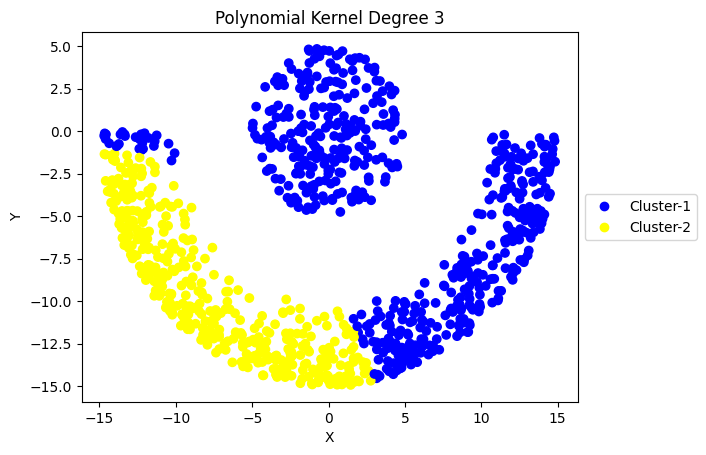

In [22]:
#Polynomial kernel degree 3
K = kmatrix(dataset,4)
K = kcenter(K)
e_value, e_vector = kernel_pca_eigen(K)
M = np.zeros((K.shape[1],1))
for j in range(1, 3):
  M = np.column_stack((M,e_vector[:,-j]/(np.linalg.norm(e_vector[:,-j]))))
E = M[:, 1:]
for i in range(E.shape[0]):
  E[i,:] = l2_norm(E[i,:])
itr,cent, err,assign = llyod(E.T,2,15)
classes = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4']
scatter = plt.scatter(dataset[0, :], dataset[1, :], c = assign, cmap=cmap)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Polynomial Kernel Degree 3')

In [24]:
#RBF Kernel ; Sigma = 0.5
K = kmatrix(dataset,50)
K = kcenter(K)
e_value, e_vector = kernel_pca_eigen(K)
M = np.zeros((K.shape[1],1))
for j in range(1, 3):
  M = np.column_stack((M,e_vector[:,-j]/(np.linalg.norm(e_vector[:,-j]))))
E = M[:, 1:]
for i in range(E.shape[0]):
  E[i,:] = l2_norm(E[i,:])
itr,cent, err,assign = llyod(E.T,2,15)
classes = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4']
scatter = plt.scatter(dataset[0, :], dataset[1, :], c = assign, cmap=cmap)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("X")
plt.ylabel("Y")
plt.title('RBF Kernel; Sigma = 0.5')

C:\Users\Joyal Pasricha\AppData\Local\Temp\ipykernel_20672\740352388.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 4
  plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 1.0, 'RBF Kernel; Sigma = 0.5')

C:\Users\Joyal Pasricha\AppData\Local\Temp\ipykernel_20672\3790896872.py:14: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 4
  plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 1.0, 'RBF Kernel; Sigma = 1')

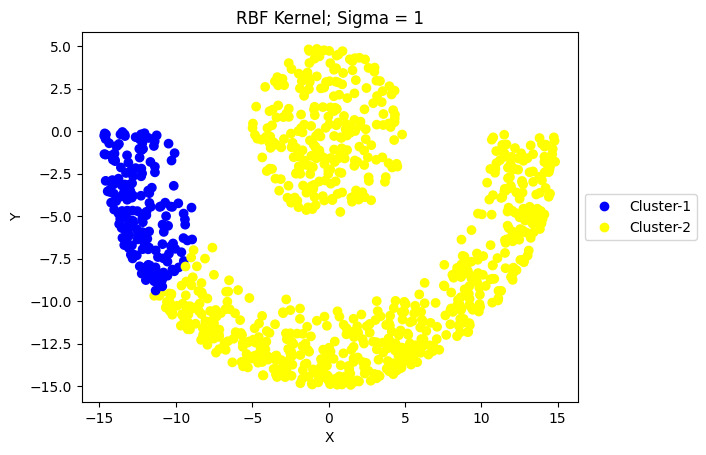

In [28]:
#RBF Kernel WITH Sigma = 1
K = g_kmatrix(dataset,1)
K = kcenter(K)
e_value, e_vector = kernel_pca_eigen(K)
M = np.zeros((K.shape[1],1))
for j in range(1, 3):
  M = np.column_stack((M,e_vector[:,-j]/(np.linalg.norm(e_vector[:,-j]))))
E = M[:, 1:]
for i in range(E.shape[0]):
  E[i,:] = l2_norm(E[i,:])
itr,cent, err,assign = llyod(E.T,2,15)
classes = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4']
scatter = plt.scatter(dataset[0, :], dataset[1, :], c = assign, cmap=cmap)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("X")
plt.ylabel("Y")
plt.title('RBF Kernel; Sigma = 1')

C:\Users\Joyal Pasricha\AppData\Local\Temp\ipykernel_20672\975618873.py:15: UserWarning: Mismatched number of handles and labels: len(handles) = 2 len(labels) = 4
  plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))


Text(0.5, 1.0, 'RBF Kernel; Sigma = 20')

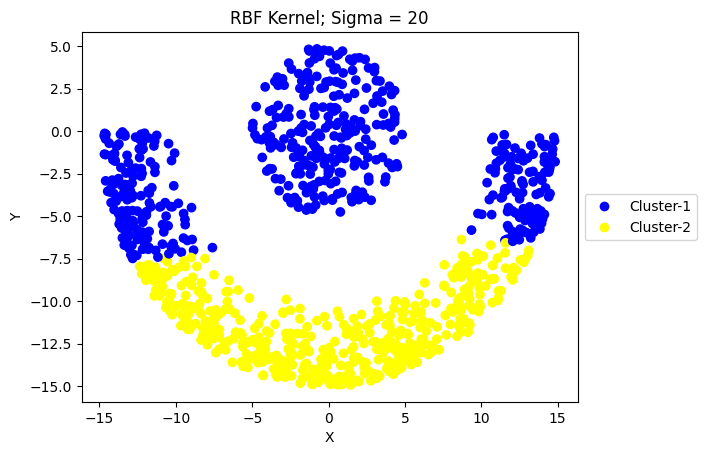

In [29]:
#RBF Kernel WITH  Sigma = 20
K = g_kmatrix(dataset,20)
K = kcenter(K)
e_value, e_vector = kernel_pca_eigen(K)
M = np.zeros((K.shape[1],1))
for j in range(1, 3):
  M = np.column_stack((M,e_vector[:,-j]/(np.linalg.norm(e_vector[:,-j]))))
E = M[:, 1:]
for i in range(E.shape[0]):
  E[i,:] = l2_norm(E[i,:])
itr,cent, err,assign = llyod(E.T,2,15)
classes = ['Cluster-1', 'Cluster-2', 'Cluster-3', 'Cluster-4']

scatter = plt.scatter(dataset[0, :], dataset[1, :], c = assign, cmap=cmap)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("X")
plt.ylabel("Y")
plt.title('RBF Kernel; Sigma = 20')

CONCLUSION-
Lloyd’s Algorithm: While Lloyd’s algorithm works well with well-separated clusters, it is sensitive to initialization and the choice of k. It is generally effective for simple, convex clusters, but not ideal for complex or overlapping cluster structures.

Kernel Methods: The polynomial kernel with degree 2 and the Gaussian kernel with a small σ performed reasonably well in some cases, though it could not fully capture the circular nature of the dataset's clusters. This suggests that spectral clustering with appropriate kernel choices might be more suitable for clustering datasets like this one.

Recommendation: If the dataset shows complex, circular or non-convex clusters, consider using spectral clustering with kernel methods like polynomial or Gaussian kernels (with an appropriate value of σ). However, if the clusters are relatively well-separated, K-means with K-means++ initialization and a carefully chosen k should work well.